In [ ]:
##### Rainy days script #####

In [ ]:
# First run the library, setting directory, load in data, and time column cells for one region to make the figures for a specific region.
# In the last cell of this code, you can find the coordinates of Raichur and Chikkaballapur and copy and paste the ones you need for the plots.

In [32]:
##### Import libraries #####
import imdlib as imd
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import calendar
from calendar import isleap
from calendar import month_abbr
from scipy.stats import linregress
from scipy.stats import ttest_ind

In [33]:
##### Setting directory ######
# os.chdir("C:/..../")  # Set to own working directory with the csv you want to use in it
os.chdir("C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/")

In [55]:
##### Load in rainfall data of the region #####
# Check whether the csv you want to use is in the working directory set before
Raichur = pd.read_csv("clipped_raichur_rain (1).csv", delimiter=",")  # Use delimiter for comma separated data
Chikkaballapur = pd.read_csv("clipped_chikkaballapur_rain_5_points.csv", delimiter=",") 

# Choose between Raichur and Chikkaballapur
rain_region = Raichur # change this to the region (Raichur or Chikkaballapur) you want to get results for in the next cells
region = 'Raichur' # change this to the region (Raichur or Chikkaballapur) you want to get results for in the next cells
display(rain_region) # displays first and last rows of the data

# Available coordinates for Raichur: (16.25, 76.5), (16.25, 76.75), (16.25, 77), (16.5, 76.5), (16.5, 76.75), (16.5, 77)
# Available coordinates for Chikkaballapur: (13.5, 77.5), (13.5, 77.75), (13.5, 78), (13.75, 77.75), (13.75, 78)

,lat,lon,time,spatial_ref,rain
0,16.25,76.5,1901-01-01,0,0.000000
1,16.25,76.5,1901-01-02,0,0.000000
2,16.25,76.5,1901-01-03,0,0.000000
3,16.25,76.5,1901-01-04,0,0.000000
4,16.25,76.5,1901-01-05,0,0.000000
...,...,...,...,...,...
271741,16.50,77.0,2024-12-27,0,0.165201
271742,16.50,77.0,2024-12-28,0,0.000000
271743,16.50,77.0,2024-12-29,0,0.000000
271744,16.50,77.0,2024-12-30,0,0.000000


In [56]:
# Make sure that time column is read as date_time in python
# Convert 'time' column to a datetime object with automatic format inference
rain_region["date_time"] = pd.to_datetime(rain_region["time"], errors='coerce') # this step converts the time column to the readable date_time column for python
# errors statement: this will handle any values that don't match the format
# display(rain_region) # another column is added with the format of date_time for the data
# rain_region["date_time"] # shows the column of the date_time

# Set date_time as the index (index is first column as the sort of number of rows)
rain_region.set_index("date_time", inplace=True)     # True if you want it set as an index
rain_region['year'] = rain_region.index.year
rain_region['month'] = rain_region.index.month
rain_region['day'] = rain_region.index.day

# rain_region["rain"] # checking the type of the rain data (float)
# del rain_region["time"] # dont need the time column anymore
rain_region  # to check whether there is a year, month and day column


,lat,lon,time,spatial_ref,rain,year,month,day
date_time,,,,,,,,
1901-01-01,16.25,76.5,1901-01-01,0,0.000000,1901,1,1
1901-01-02,16.25,76.5,1901-01-02,0,0.000000,1901,1,2
1901-01-03,16.25,76.5,1901-01-03,0,0.000000,1901,1,3
1901-01-04,16.25,76.5,1901-01-04,0,0.000000,1901,1,4
1901-01-05,16.25,76.5,1901-01-05,0,0.000000,1901,1,5
...,...,...,...,...,...,...,...,...
2024-12-27,16.50,77.0,2024-12-27,0,0.165201,2024,12,27
2024-12-28,16.50,77.0,2024-12-28,0,0.000000,2024,12,28
2024-12-29,16.50,77.0,2024-12-29,0,0.000000,2024,12,29


In [13]:
##### Rainy days plots used in the report #####


Linear Regression Results for Raichur:
Slope (trend per year):     -0.0072 mm/day/year
Intercept:                 61.8880
R² (coefficient of determination): 0.0006
P-value:                   0.785455
Standard error:            0.0264


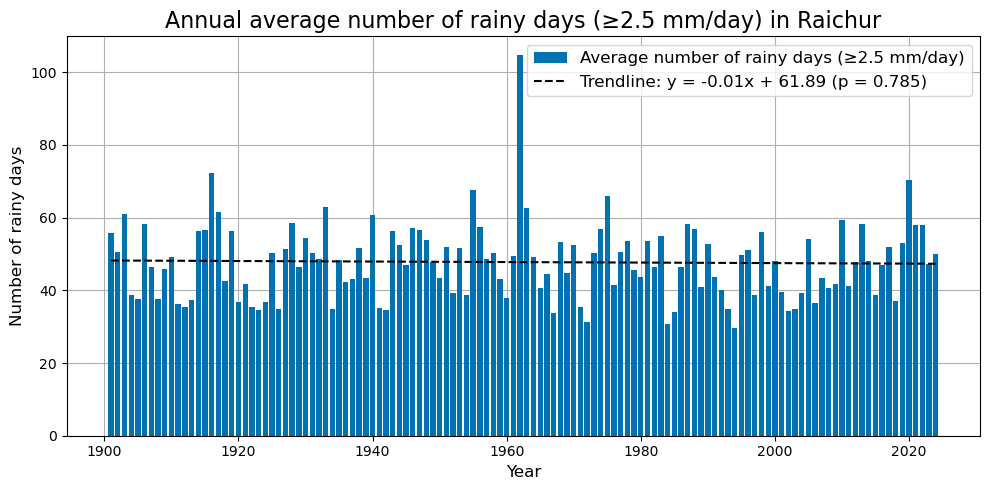

In [57]:
## Annual average number of rainy days (≥2.5 mm/day) + linear regression

# Define region and coordinates
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

# Preprocess data
rain_region['date_time'] = pd.to_datetime(rain_region['time'])
rain_region['year'] = rain_region['date_time'].dt.year
rain_region['date'] = rain_region['date_time'].dt.date  # For daily grouping

# Filter for region
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
]

# Group by day and grid point, then count rainy days (≥ 2.5 mm)
daily_rain = region_data.groupby(['date', 'lat', 'lon'])['rain'].sum().reset_index()
rainy_days = daily_rain[daily_rain['rain'] >= 2.5].copy()    
rainy_days['year'] = pd.to_datetime(rainy_days['date']).dt.year

# Count rainy days per year per grid point
rainy_days_count = rainy_days.groupby(['year', 'lat', 'lon']).size().reset_index(name='rainy_days')

# Average across grid points per year
avg_rainy_days_per_year = rainy_days_count.groupby('year')['rainy_days'].mean()

# Regression
x = avg_rainy_days_per_year.index.astype(int)
y = avg_rainy_days_per_year.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
trend_label = f"Trendline: y = {z[0]:.2f}x + {z[1]:.2f} (p = {p_value:.3f})"

# Print regression statistics
print(f"\nLinear Regression Results for {region}:")
print(f"Slope (trend per year):     {slope:.4f} mm/day/year")
print(f"Intercept:                 {intercept:.4f}")
print(f"R² (coefficient of determination): {r_value**2:.4f}")
print(f"P-value:                   {p_value:.6f}")
print(f"Standard error:            {std_err:.4f}")

# Plot settings
plt.figure(figsize=(10, 5))
plt.grid(True, zorder=0)

bar = plt.bar(x, y, color='#0072B2', zorder=2)
line, = plt.plot(x, p(x), color='black', linestyle='--', zorder=3)

plt.legend(handles=[bar, line], labels=['Average number of rainy days (≥2.5 mm/day)', trend_label], loc='upper right', fontsize=12)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of rainy days", fontsize=12)
plt.title(f"Annual average number of rainy days (≥2.5 mm/day) in {region}", fontsize=16)
plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"annual_average_rainy_days_2.5mmday_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Plot
plt.show()


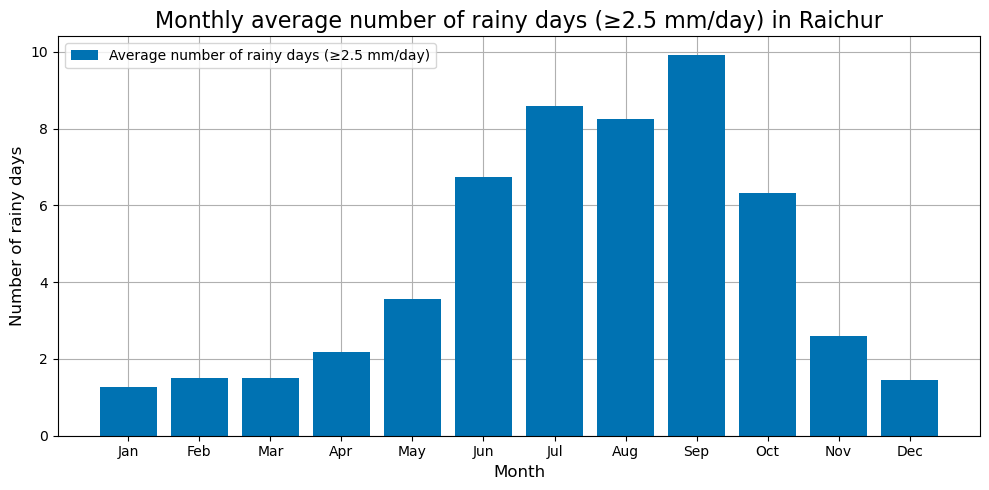

In [58]:
## Monthly average number of rainy days (≥2.5 mm/day) over all years and all data points

# Define region and coordinates
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

# Filter for region coordinates
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
]

# Group by date, lat, lon and sum rainfall
daily_rain = region_data.groupby(['year', 'month', 'day', 'lat', 'lon'])['rain'].sum().reset_index()

# Identify rainy days (rain ≥ 2.5 mm)
rainy_days = daily_rain[daily_rain['rain'] >= 2.5].copy()

# Count rainy days per month per station
monthly_rainy_counts = rainy_days.groupby(['year', 'month', 'lat', 'lon']).size().reset_index(name='rainy_days')

# Average across grid points per month and year
monthly_avg_rainy_days = monthly_rainy_counts.groupby(['year', 'month'])['rainy_days'].mean().reset_index()

# Final: Average across all years for each month
avg_rainy_days_per_month = monthly_avg_rainy_days.groupby('month')['rainy_days'].mean()

# Plotting
x = np.arange(1, 13)
y = avg_rainy_days_per_month.values
month_labels = [calendar.month_abbr[m] for m in x]

plt.figure(figsize=(10, 5))
plt.bar(x, y, color='#0072B2', label='Average number of rainy days (≥2.5 mm/day)', zorder=2)
plt.xticks(x, month_labels)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of rainy days", fontsize=12)
plt.title(f"Monthly average number of rainy days (≥2.5 mm/day) in {region}", fontsize=16)
plt.grid(True, zorder=1)
plt.legend()
plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"monthly_average_rainy_days_2.5mmday_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()


T-TEST COMPARISON OF RAINY DAYS (≥2.5 mm/day) in Raichur
Month  Mean_1901–30  Mean_1995–24  Diff (days)  p-value Significant?
  Jan          1.22          1.29         0.07   0.6305           No
  Feb          1.85          1.17        -0.68   0.0700           No
  Mar          1.40          1.60         0.20   0.5134           No
  Apr          2.19          2.09        -0.10   0.7577           No
  May          3.56          3.46        -0.10   0.8295           No
  Jun          6.79          6.66        -0.12   0.8597           No
  Jul          8.04          8.41         0.37   0.7052           No
  Aug          7.69          8.68         0.99   0.2201           No
  Sep         10.60          9.86        -0.74   0.3820           No
  Oct          5.42          6.23         0.81   0.2651           No
  Nov          3.23          1.89        -1.34   0.0051          Yes
  Dec          1.44          1.20        -0.24   0.2229           No


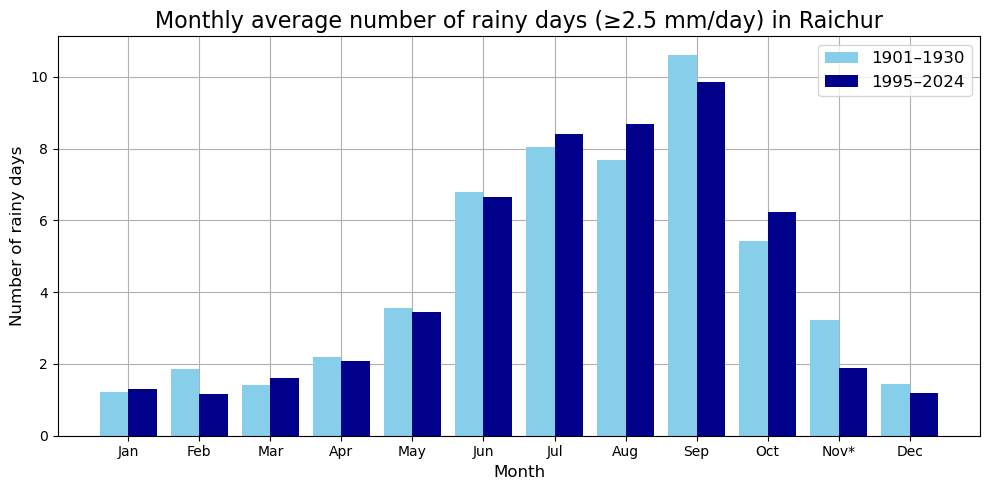

In [59]:
## Monthly average number of rainy days (≥2.5 mm/day) comparison of periods + statistical test

# Define region and coordinates
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

# Filter region data
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
].copy()

# Preprocess time columns
region_data['date'] = pd.to_datetime(region_data['time'])
region_data['year'] = region_data['date'].dt.year
region_data['month'] = region_data['date'].dt.month

# Group by day, lat, lon to get daily rain
daily_rain = region_data.groupby(['date', 'year', 'month', 'lat', 'lon'])['rain'].sum().reset_index()

# Filter for rainy days ≥ 2.5 mm
rainy_days = daily_rain[daily_rain['rain'] >= 2.5].copy()

# Count rainy days per month per grid point
rainy_day_counts = rainy_days.groupby(['year', 'month', 'lat', 'lon']).size().reset_index(name='rainy_days')

# Average over all grid points per month
monthly_rainy_days = rainy_day_counts.groupby(['year', 'month'])['rainy_days'].mean().reset_index()

# Split into periods
period1 = monthly_rainy_days[(monthly_rainy_days['year'] >= 1901) & (monthly_rainy_days['year'] <= 1930)]
period2 = monthly_rainy_days[(monthly_rainy_days['year'] >= 1995) & (monthly_rainy_days['year'] <= 2024)]

# Prepare summary table with t-tests
summary_data = []
for month in range(1, 13):
    p1_vals = period1[period1['month'] == month]['rainy_days']
    p2_vals = period2[period2['month'] == month]['rainy_days']
    
    mean1 = p1_vals.mean()
    mean2 = p2_vals.mean()
    diff = mean2 - mean1
    
    t_stat, p_val = ttest_ind(p1_vals, p2_vals, equal_var=False, nan_policy='omit')
    significant = "Yes" if p_val < 0.05 else "No"
    
    summary_data.append([calendar.month_abbr[month], round(mean1, 2), round(mean2, 2), round(diff, 2), round(p_val, 4), significant])

summary_df = pd.DataFrame(summary_data, columns=[
    'Month', 'Mean_1901–30', 'Mean_1995–24', 'Diff (days)', 'p-value', 'Significant?'
])

# Print table
print(f"\nT-TEST COMPARISON OF RAINY DAYS (≥2.5 mm/day) in {region}")
print(summary_df.to_string(index=False))

# --- Plotting ---
monthly_avg_p1 = period1.groupby('month')['rainy_days'].mean()
monthly_avg_p2 = period2.groupby('month')['rainy_days'].mean()

x = np.arange(1, 13)
bar_width = 0.4

# Add * to significant months
significant_months = summary_df[summary_df['Significant?'] == "Yes"]['Month'].tolist()
month_labels = [
    f"{calendar.month_abbr[m]}*" if calendar.month_abbr[m] in significant_months else calendar.month_abbr[m]
    for m in x
]

plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - bar_width/2, monthly_avg_p1.values, width=bar_width, label='1901–1930', color='skyblue', zorder=2)
bars2 = plt.bar(x + bar_width/2, monthly_avg_p2.values, width=bar_width, label='1995–2024', color='darkblue', zorder=2)

plt.xticks(x, month_labels)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of rainy days", fontsize=12)
plt.title(f"Monthly average number of rainy days (≥2.5 mm/day) in {region}", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, zorder=0)
plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"monthly_average_rainy_days_periods_2.5mmday_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
##### Coordinates Raichur and Chikkaballapur #####

In [ ]:
########## Do not run this code, only copy the parts for the coordinates you need ###########
#### Raichur coordinates
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

#### Chikkaballapur coordinates
region = 'Chikkaballapur'  # "Raichur" or "Chikkaballapur"
#region_coords = [ 
#(16.25, 76.5), (16.25, 76.75), (16.25, 77),
#   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
#]                                             # Raichur coordinates

region_coords = [           
    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
    (13.75, 77.75), (13.75, 78)
]                                             # Chikkaballapur coordinates
